# Classification: Logit and KKN
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), February 2019
The code in this Jupyter notebook was written using Python 3.6. It uses data files `?`, and ? image files in the `images` folder in the same directory as this notebook. This data file and image file are stored along with the Jupyter notebook file `Logit_KNN_LDA.ipynb` in the public GitHub repository [https://github.com/rickecon/Notebooks/tree/master/Classification](https://github.com/rickecon/Notebooks/tree/master/Classification). For the code to run properly, you will either need to have access to the internet or you should have the data files in the same folder as the Jupyter notebook file. Otherwise, you will have to change the respective lines of the code that read in the data to reflect the location of that data. Much of this discussion follows the presentation in chapters 2, 3, and 4 of [JWHT17].

For teaching and learning purposes, it is best to clear all cell output by selecting `Cell` then `All Output` then `Clear` from the menu across the top of this notebook. However, this notebook comes with all the cells' output displayed.

## 1. Quantitative Versus Qualitative Data
The regression models of the Linear Regression notebook have quantitative variables as dependent variables. That is, the $y_i$ variable takes on a continuum of values. We use a different class of models to estimate the relationship of exogenous variables to *qualitative* or *categorical* endogenous or dependent variables.

Examples of qualitative or categorical variables include:

* Binary variables take on two values ($J=2$), most often 0 or 1. Examples: Male or female, dead or alive, accept or reject.
* General categorical variables can take on more than two values ($J\geq 2$). Examples: red, blue, or green; teenager, young adult, middle aged, senior.

Note with general categorical variables that order and numerical distance do not matter. As an example let $FlowerColor_i=\{red=1, blue=2,green=3\}$ be a function of $neighborhood_i$, $season_i$, and $income_i$.

$$ FlowerColor_i = \beta_0 + \beta_1 neighborhood_i + \beta_2 season_i + \beta_3 income_i + u_i $$

We could mathematically estimate this regression model, but would that make sense? What would be wrong with a regression model?

### 1.1 The classification setting
Let $y_i$ be a qualitative dependent variable on $N$ observations with $i$ being the index of the observation, and let $x_{p,i}$ be the $i$th observation of the $p$th explanatory variable (independent variable) such that $X_i=\{x_{1,i}, x_{2,i}, ... x_{P,i}\}$.

## 2. Logistic Regression Classifier
In this section, we will look at two models for binary (0 or 1) categorical dependent variables. We describe the first model--the linear probability (LP) model--for purely illustrative purposes. This is because the LP model has some serious shortcomings that make it almost strictly dominated by our second model in this section.

The second model--the logistic regression (logit, binary classifier) model--will be the focus of this section. There is another variant of this model, the probit model. But the logistic model is the more flexible, more easily interpretable, and more commonly used of the two.

### 2.1. The linear probability (LP) model
One option in which a regression is barely acceptable for modeling a binary (categorical) dependent variable is the linear probability (LP) model. When the dependent variable has only two categories, it can be modeled as $y_i\in\{0,1\}$ without loss of generality. Let the variable $z_i$ be interpreted as the probability that $y_i=1$ given the data $X_i$ and parameter values $\theta=\{\beta_0,\beta_1,...\beta_P\}$.

$$ z_i = Pr(y_i=1|X_i,\theta) = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} + u_i $$

The LP model can be a nice, easy, computationally convenient way to estimate the probability of outcome $y_i=1$. This could also be reinterpreted, without loss of generality, as the probability that $y_i=0$. This is equivalent to a redefinition of which outcome is defined as $y_i=1$.

The main drawback of the LP model is that the predicted values of the probability that $y_i=1$ or $Pr(y_i=1|X_i,\theta)$ can be greater than 1 and can be less than 0. It is for this reason that it is very difficult to publish any research based on an LP model.

### 2.2. The logistic (logit) regression classifier
The logistic regression model is a binary dependent variable classifier that constrains its predicted values to be stricly between 0 and 1. This is done by using a sigmoid function as the model on the right-hand-side of the equation,

$$ f(x) = \frac{g(x)}{1 + g(x)} \quad\text{for}\quad x\in(-\infty,\infty) \quad\text{and}\quad g(x)\geq 0 \quad\forall x $$

and has the following general shape.

![sigmoid.png](attachment:sigmoid.png)

The logistic function is the specific case of the sigmoid function in which $g(X)= e^{X\beta} = e^{\beta_0 + \beta_1 x_{1,i} + ...\beta_P x_{P,i}}$.

$$ Pr(y_i=1|X_i,\theta) = \frac{e^{X_i\beta}}{1 + e^{X_i\beta}} = \frac{e^{\beta_0 + \beta_1 x_{1,i} + ...\beta_P x_{P,i}}}{1 + e^{\beta_0 + \beta_1 x_{1,i} + ...\beta_P x_{P,i}}} $$

We could estimate the paramters $\theta=\{\beta_0,\beta_1,...\beta_P\}$ by GMM using nonlinear least squares or a more general set of moments to match. But maximum likelihood estimation is the most common method for estimating the parameters $\theta$ because of its more robust statistical properties. Also, the distributional assumptions are built into the model, so they are not overly strong.

#### 2.2.1. Nonlinear least squares estimation
If we define $z_i = Pr(y_i=1|X_i,\theta)$, then the error in the logistic regression is the following.

$$ \varepsilon_i = y_i - z_i $$

The GMM specification of the nonlinear least squares method of estimating the parameter vector $\theta$ would then be the following.

$$ \hat{\theta}_{nlls} = \theta:\quad \min_{\theta} \sum_{i=1}^N\varepsilon_i^2 \quad = \quad \min_{\theta}\sum_{i=1}^N\bigl(y_i - z_i \bigr)^2 \quad = \quad \min_{\theta} \sum_{i=1}^N\Bigl[y_i - Pr(y_i=1|X_i,\theta)\Bigr]^2 $$

#### 2.2.2. Maximum likelihood estimation
We characterized the general likelihood function for a sample of data as the probability that the given sample $(y_i,X_i)$ came from the assumed distribution given parameter values $Pr(y_i=1|X_i,\theta)$.

$$ \mathcal{L}(y_i,X_i|\theta) = \prod_{i:y_i=1}Pr(y_i=1|X_i,\theta)\prod_{i':y_{i'}=0}\Bigl[1 - Pr(y_i=1|X_i,\theta)\Bigr] $$

The intuition of this likelihood function is that you want the probability of the observations for which $y_i=1$ to be close to one $Pr(X)$, and you want the probability of the observations for which $y_i=0$ to also be close to one $1 - Pr(X)$.

The log-likelihood function, which the MLE problem maximizes is the following.

$$\ln\bigl[\mathcal{L}(y_i,X_i|\theta)\bigr] = \sum_{i:y_i=1}\ln\bigl[Pr(y_i=1|X_i,\theta)\bigr] + \sum_{i':y_{i'}=0}\ln\biggl(\Bigl[1 - Pr(y_i=1|X_i,\theta)\Bigr]\biggr) $$

The MLE problem for estimating $\theta$ of the logistic regression model is, therefore, the following.

$$ \hat{\theta}_{mle} = \theta:\quad \max_{\theta} \ln\bigl[\mathcal{L}(y_i,X_i|\theta)\bigr] $$

#### 2.2.3. Titanic example
A good example of logistic regression comes from a number of sources. But I am adapting some code and commentary from [http://www.data-mania.com/blog/logistic-regression-example-in-python/](http://www.data-mania.com/blog/logistic-regression-example-in-python/). The research question is to use a famous Titanic passenger dataset to try to identify the characteristics that most predict whether you survived $y_i=1$ or died $y_i=0$.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

url = ('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/' +
      'master/titanic-train.csv')
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age',
                   'SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**VARIABLE DESCRIPTIONS **

Survived - Survival (0 = No; 1 = Yes)
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name - Name
Sex - Sex
Age - Age
SibSp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Ticket - Ticket Number
Fare - Passenger Fare (British pound)
Cabin - Cabin
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Checking that your target variable is binary**

Since we are building a model to predict survival of passangers from the Titanic, our target is going to be "Survived" variable from the titanic dataframe. To make sure that it's a binary variable, let's use Seaborn's countplot() function.

In [2]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

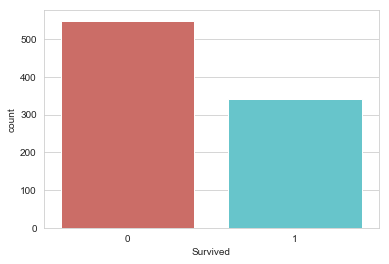

In [3]:
sb.countplot(x='Survived', data=titanic, palette='hls')

**Checking for missing values**

It's easy to check for missing values by calling the `isnull()` method, and the `sum()` method off of that, to return a tally of all the `True` values that are returned by the `isnull()` method.

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many observations are there in the DataFrame?

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Model selection and missing values**

The variable `Cabin` is almost all missing values, so we should not include that in our analysis (although that would be an interesting variable to have). We can also probably exclude `Name`, `Ticket` (ticket number). But we will include all the other variables.

* Survived - This variable is obviously relevant.
* Pclass - Does a passenger's class on the boat affect their survivability?
* Sex - Could a passenger's gender impact their survival rate?
* Age - Does a person's age impact their survival rate?
* SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probably.
* Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probably.
* Fare - Does the fare a person paid effect his survivability? Maybe.
* Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled.

In [6]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now we have the dataframe reduced down to only relevant variables, but now we need to deal with the missing values in the age variable.

**Imputing missing values**

Let's look at how passenger age is related to their class as a passenger on the boat.

3    491
1    216
2    184
Name: Pclass, dtype: int64


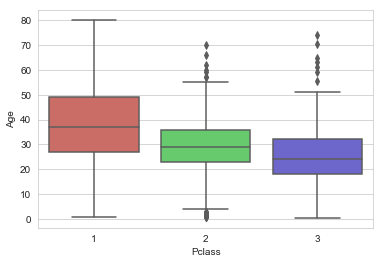

In [7]:
print(titanic_data['Pclass'].value_counts())
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

Speaking roughly, we could say that the younger a passenger is, the more likely it is for them to be in 3rd class. The older a passenger is, the more likely it is for them to be in 1st class. So there is a loose relationship between these variables. So, let's write a function that approximates a passengers age, based on their class. From the box plot, it looks like the average age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

So let's write a function that finds each null value in the `Age` variable, and for each null, checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.

In [8]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

There are 2 null values in the `Embarked` variable. We can drop those 2 records without loosing too much important information from our dataset, so we will do that.

In [9]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Converting categorical variables to a dummy indicators**

The next thing we need to do is reformat our variables so that they work with the model. Specifically, we need to reformat the Sex and Embarked variables into numeric variables.

In [10]:
print(titanic_data['Sex'].value_counts())
gender = pd.get_dummies(titanic_data['Sex'], drop_first=True)
print(gender.head())
# gender2 = pd.get_dummies(titanic_data['Sex'], drop_first=False)
# gender2.head()

male      577
female    312
Name: Sex, dtype: int64
   male
0     1
1     0
2     0
3     0
4     1


In [11]:
print(titanic_data['Embarked'].value_counts())
embark_location = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark_location.head()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [12]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [14]:
titanic_dmy = pd.concat([titanic_data, gender, embark_location], axis=1)
titanic_dmy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now we have a dataset with all the variables in the correct format.

**Checking for correlation vs. independence between variables**

We can use `seaborn`'s `.heatmap` method to get a color-coded heatmap of the correlation matrix.

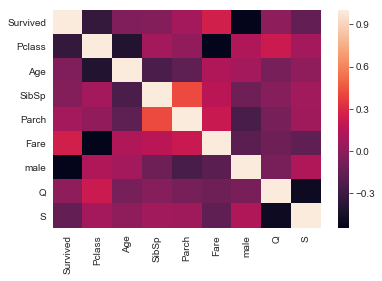

In [15]:
sb.heatmap(titanic_dmy.corr())

It is OK for the first row and first column to have correlation (dark red or dark blue). But we want to avoid heavy correlation among the independent variables (regressors). It looks like `Fare` and `Pclass` are highly negatively correlated, so let's just keep `Fare`. `Fare` is nice becaue it is more continuous than `Pclass`. Also, the embark locations of `Q` and `S` are highly negatively correlated, but that is to be expected because they are mutually exclusive. So we will keep both.

In [16]:
titanic_dmy.drop(['Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


**Checking that your dataset size is sufficient**

We have 6 predictive features that remain. The rule of thumb is 50 records per regressor. So we need to have at least 350 records in this dataset. Let's check again.

In [17]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.3 KB


The next step is to divide up the data into training data $(y_{trn,i}, X_{trn,i})$ and test data $(y_{tst,i}, X_{tst,i})$.

In [18]:
# X and y are numpy arrays, not a DataFrame and Series, respectively.

X = titanic_dmy[['Age', 'SibSp', 'Parch', 'Fare',
                 'male', 'Q', 'S']].values
y = titanic_dmy['Survived'].values
print(X)

[[22.  1.  0. ...  1.  0.  1.]
 [38.  1.  0. ...  0.  0.  0.]
 [26.  0.  0. ...  0.  0.  1.]
 ...
 [24.  1.  2. ...  0.  0.  1.]
 [26.  0.  0. ...  1.  0.  0.]
 [32.  0.  0. ...  1.  1.  0.]]


In [19]:
# This function train_test_split is from sklearn.cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4,
                                                    random_state=25)
X_train.shape

(533, 7)

We are now ready to let scikit-learn run the maximum likelihood estimation of our multiple logistic regression classifier model.

In [20]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
print(LogReg.intercept_)
print(LogReg.coef_)

[1.592903]
[[-0.02558109 -0.31831145 -0.20176942  0.02056714 -2.40322119 -0.47723787
  -0.37706721]]


In [21]:
y_pred = LogReg.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[180,  32],
       [ 48,  96]])

The confusion matrix tells us Type I and Type II errors. The results from the confusion matrix are telling us that 180 and 48 are the number of correct predictions. 96 and 32 are the number of incorrect predictions.

In [23]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.85      0.82       212
          1       0.75      0.67      0.71       144

avg / total       0.77      0.78      0.77       356



In [24]:
LogReg.coef_

array([[-0.02558109, -0.31831145, -0.20176942,  0.02056714, -2.40322119,
        -0.47723787, -0.37706721]])

In [25]:
LogReg.intercept_

array([1.592903])

The `statsmodels.api` package also has a `logit` model that can be run in a similar way to how we ran the linear regression model in the [Linear Regression]() notebook. It is interesting to note the difference between the `scikit-learn` logit model and the `statsmodel` one. `scikit-learn` is focused on prediction accuracy and makes it a little more difficult to access the estimated parameters. The `statsmodel` output is more focused on the estimated parameters and model fit, and it is more work to test the predictive power. For this reason, the studying logistic regression provides a nice bridge into machine learning.

Machine learning does not care about standard errors. However, we have every information we need to compute standard errors. We use a package in api to do this:

In [26]:
import statsmodels.api as sm

# Add a constant to the numpy array
num_obs = X.shape[0]
const_vec = np.ones(num_obs).reshape((num_obs, 1))
XplusConst = np.hstack((const_vec, X))

LogitModel = sm.Logit(y, XplusConst)
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()
# Remember y and X variables are
# y  = Survived (1, 0)
# x1 = Age
# x2 = SibSp
# x3 = Parch
# x4 = Fare
# x5 = male
# x6 = Q
# x7 = S

Optimization terminated successfully.
         Current function value: 0.475647
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  889
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:                  0.2850
Time:                        09:19:12   Log-Likelihood:                -422.85
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                 7.044e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9208      0.331      5.811      0.000       1.273       2.569
x1            -0.0183      0.007     -2.572      0.010      -0.032      -0.004
x2            -0.3929      0.104     -3.790      0.000      -0.596      -0.190
x3            -0.2213      0.114     -1.943      0.052      -0.445       0.002
x4             0.0148      0.003      5.179      0.000       0.009       0.020
x5            -2.6362      0.190    -13.865      0.000      -3.009      -2.264
x6            -0.7175      0.362     -1.982      0.048      -1.427      -0.008
x7            -0.5003      0.226     -2.210      0.027      -0.944      -0.057
==============================================================================
"""

#### 2.2.4 Interpreting coefficients (log odds ratio)
The odds ratio in the logistic model is provides a nice way to interpret logit model coefficients. Let $z\equiv X^T\beta = \beta_0 + \beta_1 x_{1,i} + ...\beta_K x_{K,i}$. The logistic model is stated by the probability that the binary categorical dependent variable equals one $y_i=1$.
\begin{equation}
  P(y_i=1|X,\theta) = \frac{e^z}{1 + e^z}
\end{equation}
Given this equation, we know that the probability of the dependent variable being zero $y_i=0$ is just one minus the probability above.
\begin{equation}
  P(y_i=0|X,\theta) = 1 - P(y_i=1|X,\theta) = 1 - \frac{e^z}{1 + e^z} = \frac{1}{1 + e^z}
\end{equation}

The odds ratio is a common way of expressing the probability of an event versus all other events. For example, if the probability of your favorite team winning a game is $P(win)=0.8$, then we know that the probability of your favorite team losing that game is $P(lose)=1-P(win)=0.2$. The odds ratio is the ratio of these two probabilities.
\begin{equation}
  \frac{P(win)}{P(lose)} = \frac{P(win)}{1 - P(win)} = \frac{0.8}{0.2} = \frac{4}{1} \quad\text{or}\quad 4
\end{equation}
The odds ratio tells you that the probability of your team winning is four times as likely as your team losing. A gambler would say that your odds are 4-to-1. Another way of saying it is that your team will win four out of five times and will lose 1 out of five times.

In the logistic model, the odds ratio reduces the problem nicely.
\begin{equation}
  \frac{P(y_i=1|X,\theta)}{1 - P(y_i=1|X,\theta)} = \frac{\frac{e^z}{1 + e^z}}{\frac{1}{1 + e^z}} = e^z
\end{equation}
If we take the log of both sides, we see that the log odds ratio is equal to the linear predictor $z\equiv X^T\beta = \beta_0 + \beta_1 x_{1,i} + ...\beta_K x_{K,i}$.
\begin{equation}
  \ln\left(\frac{P(y_i=1|X,\theta)}{1 - P(y_i=1|X,\theta)}\right) = z = \beta_0 + \beta_1 x_{1,i} + ...\beta_K x_{K,i}
\end{equation}

So the interpretation of the coeficients $\beta_k$ is that a one-unit increase of the variable $x_{k,i}$ increases the odds ratio or the odds of $y_i=1$ by $\beta_{k,i}$ percent.

## 3. K-nearest Neighbors (KNN) Classifier
The $K$-nearest Neighbors (KNN) classifier is a nonparametric model, based on the value of the parameter $K$ that predicts the category of a given observation. It is often referred to as an unsupervised learning method because it, in some sense, requires no model. The KNN method simply uses the data in the neighborhood of each datapoint to predict type. Let $J\geq 2$ be the number of possible categories such that $y_i\in\{1,2,...J\}$. Assume a special case in which we have data on two variables $X_i=(x_{1,i}, x_{2,i})$ for each observation. This example is easy to visualize (2 dimensional data).

The KNN classifier finds the $K$ points in the data that are closest to $X_0$ and calculates the conditional probability for each category $j$ in that set of $K$ points. Define the set of observations $i$ in that set of $K$ points closest to $X_0$ as $\mathcal{N}_0$. Euclidean distance is often used,

\begin{equation}
  d(x,x') \equiv \sqrt{(x_1-x_1')^2 + (x_2-x_2')^2 + ... (x_N-x_N')^2}
\end{equation}

although other distance metrics can be used and might even be more suitable. Examples include the Manhattan, Chebyshev, and Hamming distance. The KNN model is specified as follows.

$$ Pr(Y=j|X=X_0) = \frac{1}{K}\sum_{i\in\mathcal{N}_0}I\left(y_i=j\right) $$

Notice that the left-hand-side of this model has similar structure to the logistic regression model. The KNN classifier applies Bayes rule and classifies the test observation $X_0$ to the class with the largest probability.

The Figure 2.14 from [JWHT17] illustrates a KNN classifier with $K=3$ for six blue and six orange observations. The left pannel highlights the $K=3$ nearest observations to the observation marked "x". Of those three nearest neighbors, 2/3 are blue and 1/3 are orange. So Bayes rule classifies the observation marked "x" as blue.

![Fig2_14.png](images/Fig2_14.png)

The panel on the right in Figure 2.14 shows the decision boundary for each classification. This boundary is the point where the two categories have the same probability Pr(Y=j|X) = 1/2.

Figure 2.15 below shows a larger set of simulated binary dependent variable data for KNN classifier $K=10$. Notice that the black line decision boundary is very close to the optimal dashed line Bayes classifier (if you knew the true data generating process). We show this to demonstrate how well and how flexibly a KNN classifier can perform.

![Fig2_15.png](images/Fig2_15.png)

Figure 2.16 below presents two extremes in KNN classifiers. The left panel is the $K=1$ KNN classifier. This KNN simply assigns the value of the closest neighbor to the data. Notice how rough the decision boundaries are. This KNN classifier is probably overfitting the data. That is, it is likely capturing too much noise to be good at predicting test data.

![Fig2_16.png](images/Fig2_16.png)

The right panel of Figure 2.16 shows a KNN classifier with $K=100$. This classifier barely has any contour at all. This classifier is likely underfitting the data or ignoring information. This can be seen by comparing the black KNN decision boundary to the dashed optimal Bayes classifier decision boundary.

### 3.1. Examples: Iris and Digits
[TODO] Include Iris example from [https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/) and digits data example from [http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

In [27]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
print(X_digits)
y_digits = digits.target
print(y_digits)

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
KNN score: 0.961111
LogisticRegression score: 0.938889


## 4. Linear Discriminant Analysis (LDA)
[TODO] Put linear discriminant analysis (LDA) here. See Section 4.4 of [JWHT17].

## 5. Multinomial Logit
The multinomial logit model is a natural extension of the logit model. In contrast to the logit model in which the dependent variable has only two categories, the multinomial logit model accomodates $J\geq2$ categories in the dependent variable. Let $\eta_j$ be the linear predictor for the $j$th category.
$$ \eta_j\equiv \beta_{j,0} + \beta_{j,1}x_{1,i} + ...\beta_{j,K}x_{K,i} \quad\forall y_i = j $$

The multinomial logit model gives the probability of $y_i=j$ relative to some reference category $J$ that is left out.
\begin{equation}
  Pr(y_i=j|X,\theta) = \frac{e^{\eta_j}}{1 + \sum_v^{J-1}e^{\eta_v}} \quad\text{for}\quad 1\leq j\leq J-1
\end{equation}

Once the $J-1$ sets of coefficients are estimated, the final $J$th set of coefficients are a residual based on the following expression.
\begin{equation}
  Pr(y_i=J|X,\theta) = \frac{1}{1 + \sum_v^{J-1}e^{\eta_v}}
\end{equation}

The analogous log odds ratio interpretation applies to the multinomial logit model.
\begin{equation}
  \ln\left(\frac{Pr(y_i=j|X,\theta)}{Pr(y_i=J|X,\theta)}\right) = \eta_j = \beta_{j,0} + \beta_{j,1}x_{1,i} + ...\beta_{j,K}x_{K,i} \quad\text{for}\quad 1\leq j \leq J-1
\end{equation}
This is the odds ratio of $y_i=j$ relative to $y_i=J$. The interpretation of the $\beta_{j,k}$ coefficient is the predicted percentage change in the log odds ratio of $y_i=j$ to $y_i=J$ from a one-unit increase in variable $x_{k,i}$.

In [28]:
# This code comes from the scikit-learn example for multinomial logit
# at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# The y variable is J=3 categories of iris (0=Setosa, 1=Versicolour, 2=Virginica)
# The four columns of X represent Sepal Length, Sepal Width, Petal Length and Petal Width
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
X, y = load_iris(return_X_y=True)
print(np.unique(y, return_counts=True))
print(X.shape)
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
print(clf.score(X, y))

print(clf.intercept_)
print(clf.coef_)

(array([0, 1, 2]), array([50, 50, 50]))
(150, 4)
[0 0]
[[9.81802952e-01 1.81970335e-02 1.43470785e-08]
 [9.71801252e-01 2.81987186e-02 2.97708794e-08]]
0.9733333333333334
[  9.88068195   2.21932072 -12.10000266]
[[-0.42332359  0.96165008 -2.5193638  -1.08617659]
 [ 0.53399144 -0.31779047 -0.20533556 -0.93955173]
 [-0.11066785 -0.64385961  2.72469936  2.02572832]]


## 6. References
* [JWHT17] Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani. *An Introduction to Statistical Learning with Applications in R*, Springer Texts in Statistics, Springer, 2017.